In [1]:
import numpy as np
from matplotlib.pyplot import *
from astropy.cosmology import Planck13

from prospect.plotting.sfh import parametric_sfr
from prospect.plotting.sfh import parametric_pset
from prospect.plotting.sfh import compute_mass_formed
from prospect.models.transforms import tburst_from_fage

import sys
sys.path.append('/home/samantha/Documents/REU/scripts/')
from prospectFunctionsSFH import *

In [66]:
help(tburst_from_fage)

Help on function tburst_from_fage in module prospect.models.transforms:

tburst_from_fage(tage=0.0, fage_burst=0.0, **extras)
    This function transfroms from a fractional age of a burst to an absolute
    age.  With this transformation one can sample in ``fage_burst`` without
    worry about the case ``tburst`` > ``tage``.

    Parameters
    ----------
    tage : float, Gyr
        The age of the host galaxy.

    fage_burst : float between 0 and 1
        The fraction of the host age at which the burst occurred.

    Returns
    -------
    tburst : float, Gyr
        The age of the host when the burst occurred (i.e. the FSPS ``tburst``
        parameter)



In [57]:
# Suppose
# FIXED PARAMETERS
run_params = {}
run_params['sfh'] = 1
run_params['imf_type'] = 2
run_params['mass'] = 1e8
run_params['zred'] = 3.548
run_params['logzsol'] = 0.0
run_params['dust2'] = 0.0
run_params['dust_type'] = 0

# FREE PARAMETERS
run_params['tage'] = 0.1 # bounds: [0.1,2] Gyrs
run_params['tau'] = .2 # bounds: [0.1, 1e2] Gyrs
run_params['fburst'] = .001 # bounds: [0,1) Fractional
run_params['fage_burst'] = 0.5 # bounds: [0,1] Fractional

# Fractional parameters
f_params = {}
# run_params['tage'] = run_params['tage']
run_params['fstart'] = 0.0 # Doesn't make sense to change this value AND tage (effectively are the same)
run_params['ftrunc'] = 0.0 # bounds: [0,1) Fractional

run_params['sf_start'] = sf_start_from_fstart(**run_params)
run_params['sf_trunc'] = sf_trunc_from_ftrunc(**run_params)

# Add a conditional (automatically output break_strength = 0 if const+fburst>1)
run_params['const'] = .1 # bounds: [0,1]

In [58]:
parametric_pset(**run_params)

Namespace(mass=array([1.e+08]), sfh=1, sf_start=array([0.]), tage=array([0.1]), tau=array([0.2]), const=array([0.1]), fburst=array([0.001]), tburst=array([1.]), sf_trunc=array([0.]), sf_slope=array([0.]))

In [59]:
times = np.linspace(0,run_params['tage'],10000)
times_plot = times + Planck13.lookback_time(run_params['zred']).value

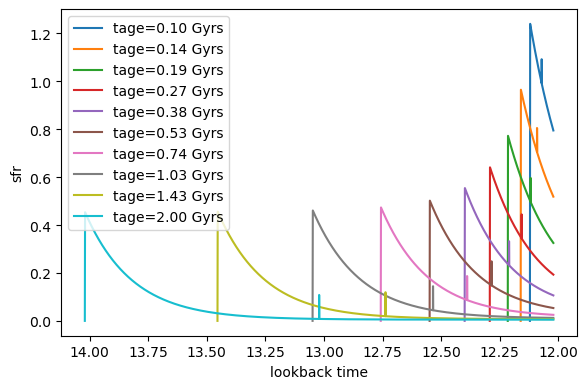

In [64]:
fig, ax = subplots(figsize=(6,6*8/12))

tages = np.logspace(-1,np.log10(2.), 10)

for t in tages:
    run_params['tage'] = t
    run_params['tburst'] = tburst_from_fage(**run_params)
    times = np.linspace(0,run_params['tage'],10000)
    times_plot = times + Planck13.lookback_time(run_params['zred']).value
    sfrs = parametric_sfr(times=times,**run_params)
    # print(parametric_pset(**run_params))
    ax.plot(times_plot,sfrs,label=f'tage={t:.2f} Gyrs')

ax.invert_xaxis()
# ax.set_xscale('log')
# ax.set_xlim([Planck13.lookback_time(1100).value, times_plot[0]/1.001]) # 13.8 Gyrs to observable time
ax.set_xlabel('lookback time')
ax.set_ylabel('sfr')
legend()
tight_layout()

show()

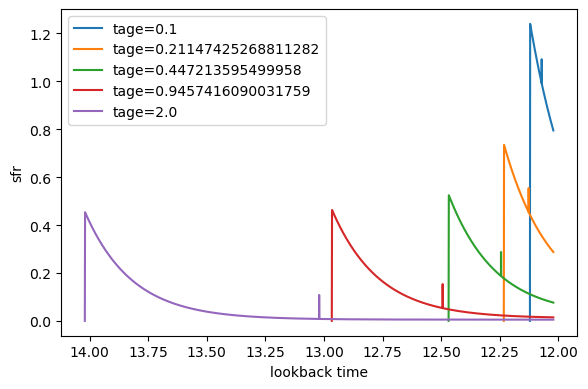

In [61]:
fig, ax = subplots(figsize=(6,6*8/12))

tages = np.logspace(-1,np.log10(2.), 5)

for t in tages:
    run_params['tage'] = t
    run_params['tburst'] = tburst_from_fage(**run_params)
    times = np.linspace(0,run_params['tage'],10000)
    times_plot = times + Planck13.lookback_time(run_params['zred']).value
    sfrs = parametric_sfr(times=times,**run_params)
    # print(parametric_pset(**run_params))
    ax.plot(times_plot,sfrs,label=f'tage={t}')

ax.invert_xaxis()
# ax.set_xscale('log')
# ax.set_xlim([Planck13.lookback_time(1100).value, times_plot[0]/1.001]) # 13.8 Gyrs to observable time
ax.set_xlabel('lookback time')
ax.set_ylabel('sfr')
legend()
tight_layout()

show()

In [ ]:
fig, ax = subplots(figsize=(5,5*8/12))

sfrs = parametric_sfr(times=times,**run_params)
ax.plot(times,sfrs)

ax.invert_xaxis()
ax.set_xlabel('lookback time')
ax.set_ylabel('sfr')
tight_layout()

show()

In [ ]:
.8/1.1

In [ ]:
def sf_start_from_fstart(**sfh):
    pset = getNamespace(**sfh)
    return (pset.tage * pset.fstart)

In [ ]:
def sf_trunc_from_ftrunc(**sfh):
    pset = getNamespace(**sfh)
    start_trunc = pset.tage * pset.fstart
    end_trunc = (pset.tage - start_trunc) * pset.ftrunc
    return pset.tage - end_trunc
sf_trunc_from_ftrunc(**free_params)

In [ ]:
def getNamespace(**params):
    from argparse import Namespace
    pset = Namespace(**params)
    return pset

In [ ]:
getNamespace(**run_params)